# Project: Investigating the number of patients who did not show up for their appointment and why.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

In [1]:
# Import relevant libraries 
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Relevant Questions
#### Univariate Analysis <br>
1. What is the distribution of Gender?<br>
2. What is the distribution of Age?<br>
3. What is the distribution of Neighbourhood?<br>
4. What is the distribution of Patients' Conditions?<br>
4.1. Distribution of patients with Hypertension<br>
4.2. Distribution of patients with Diabetes<br>
4.3. Distribution of patients with Alcoholism<br>
4.4. Distribution of handicapped patients<br>
5. What is the distribution of receiving of messages?
6. What is the distribution of receiving of scholarships?
7. What is the distribution of showing up for appointments?

#### Multi-variate Analysis<br>
1. Is there relation between age and receiving of scholarships?<br>
2. What properties are associated with showing up for appointments?<br> 
2.1. Is Gender associated with appointment show up? <br>
2.2. Is Neighbourhood associated with appointment show up? <br>
2.3. Is Age associated with appointment show up? <br>
2.4. Is Scholarship associated with appointment show up? <br>
2.5. Is SMS_Received associated with appointment show up? <br>
2.6. Is Condition of the patient associated with appointment show up? <br>




<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load data and print first five rows.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Lets look at the size of the dataset
df.shape

(110527, 14)

- The dataset has 14 columns and 110527 rows

In [4]:
#Lets print the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The dataset has 14 columns with the following details:
- PatientId: Patient's ID
- AppointmentID: Appointment ID
- Gender: The patient's gender
- ScheduledDay: On what day the patient set up their appointment.
- AppointmentDay: On what day they showed up for the appointment.
- Age: The patient's age
- Neighbourhood: The location of the hospital.
- Scholarship: Whether or not the patient is enrolled in Brasilian welfare program: Bolsa Família; 0 means they didn't get, 1 means they got
- Hipertension: Whether or not the patient has hypertension; 0 means they don't, 1 means they have
- Diabetes: Whether or not the patient has diabetes; 0 means they don't, 1 means they have
- Alcoholism: Whether or not the patient is alcoholic; 0 means they aren't, 1 means they are
- Handcap: Whether or not the patient is handicapped; 0 means they aren't, 1 means they are
- SMS_received: Whether or not the patient received an SMS; 0 means they didn't, 1 means they did
- No-show: Whether or not the patient showed up for their appointment; Yes means they didn't show up, and No means they showed up

In [5]:
#A summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- The dataset has no missing values
- However, there are columns with incorrect datatypes:
 - ScheduledDay
 - AppointmentDay
 - Patient ID

In [6]:
# Let's check the unique values in the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

- Seems there are also no duplicates in our dataset

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary:
- There's a weird age value of -1 that we need to remove.
- Only 3% of the patients suffer from alcoholism, 7% have diabetes, 19% have hypertension and 2% are handicapped from the mean.
- Most of the patients' ages is around 37 years.

<a id='wrangling'></a>
## Data Cleaning

Here, we'll do the following:
- Change AppointmentDay and ScheduledDay datatypes to DateTime.
- Change PatientID to int.
- Rename some columns.
- Remove useless columns and Add new ones.

- Remove the '-1' age value.

In [9]:
#Converting PatientId from float to int64
df['PatientId'] = df['PatientId'].astype('int64')

#Converting ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
#Confirming changes
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [11]:
#Renaming columns
df.rename(columns = {'PatientId':'Patient_Id', 'AppointmentID':'Appointment_Id', 'ScheduledDay':'Scheduled_Day', 
                             'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension', 'SMS_received':'SMS_Received',
                              'Handcap':'Handicap', 'No-show':'No_Show'}, inplace = True)

In [12]:
df.head(1)

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Patient_Id       110527 non-null  int64         
 1   Appointment_Id   110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   Scheduled_Day    110527 non-null  datetime64[ns]
 4   Appointment_Day  110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMS_Received     110527 non-null  int64         
 13  No_Show          110527 non-null  object        
dtypes: datetime64[ns](2)

In [14]:
#Discard the -1 age value
df = df.query('Age >= 0')

In [15]:
#Print age values to confirm
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [16]:
#Dropping the Patient_Id and Appointment_Id columns, since they are not useful for this analysis
df.drop(['Patient_Id', 'Appointment_Id'], axis = 1, inplace = True)

In [17]:
#Confirm changes
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#Rename Scheduled_Day and Appointment_Day columns
df.rename(columns= {'Scheduled_Day':'Scheduled_Date', 'Appointment_Day':'Appointment_Date'}, inplace=True)

In [19]:
df.head(1)

,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
#Create new columns for the scheduled and appointment days of the week
df['Scheduled_Day'] = df.Appointment_Date.map(lambda day: day.day_name())
df['Appointment_Day'] = df.Scheduled_Date.map(lambda day: day.day_name())

In [21]:
df.head(1)

,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Scheduled_Day,Appointment_Day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday


<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is clean, We'll now explore it with some visualizations, as we try to answer our questions

### Univariate Analysis

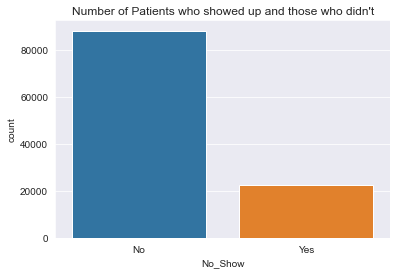

In [22]:
#Find out the distribution of No_Show
plot = sns.countplot(x=df.No_Show, data=df)
plot.set_title("Number of Patients who showed up and those who didn't")
plt.show()

In [23]:
df.groupby('No_Show').count()

,Gender,Scheduled_Date,Appointment_Date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Scheduled_Day,Appointment_Day
No_Show,,,,,,,,,,,,,
No,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [24]:
#Since values are equal for each column, we'll pick one
df.groupby('No_Show')['Gender'].count()

No_Show
No     88207
Yes    22319
Name: Gender, dtype: int64

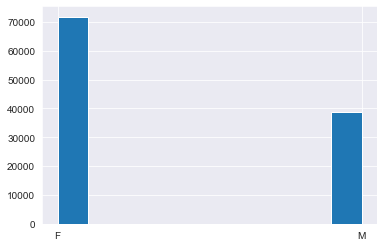

In [25]:
# Find out the distribution of Gender
df['Gender'].hist();

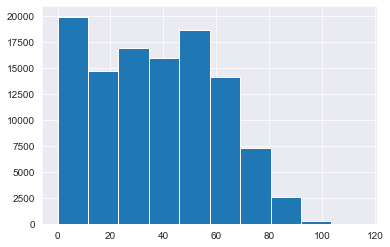

In [26]:
# Find out the distribution of Age
df['Age'].hist();

In [27]:
df.groupby('Age')['No_Show'].count()

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: No_Show, Length: 103, dtype: int64

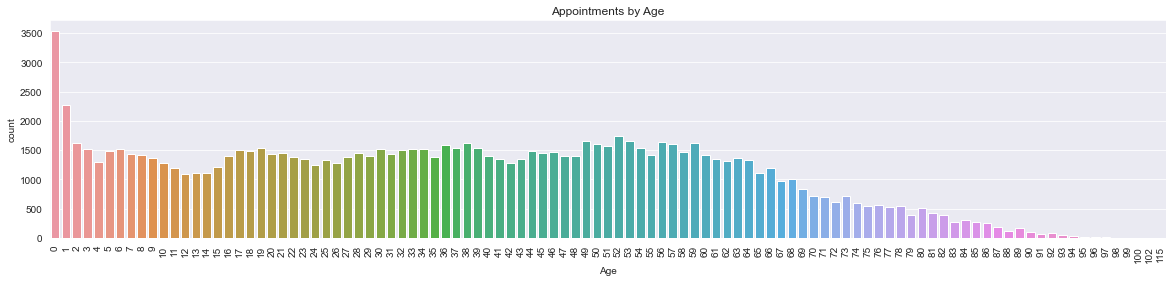

In [28]:
# More detailed distribution of Age
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plot = sns.countplot(x=df['Age'])
plot.set_title("Appointments by Age")
plt.show()

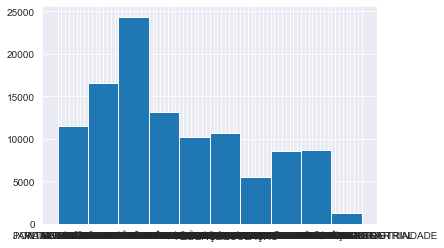

In [29]:
#Find out the distribution of Neighbourhoods
df['Neighbourhood'].hist();

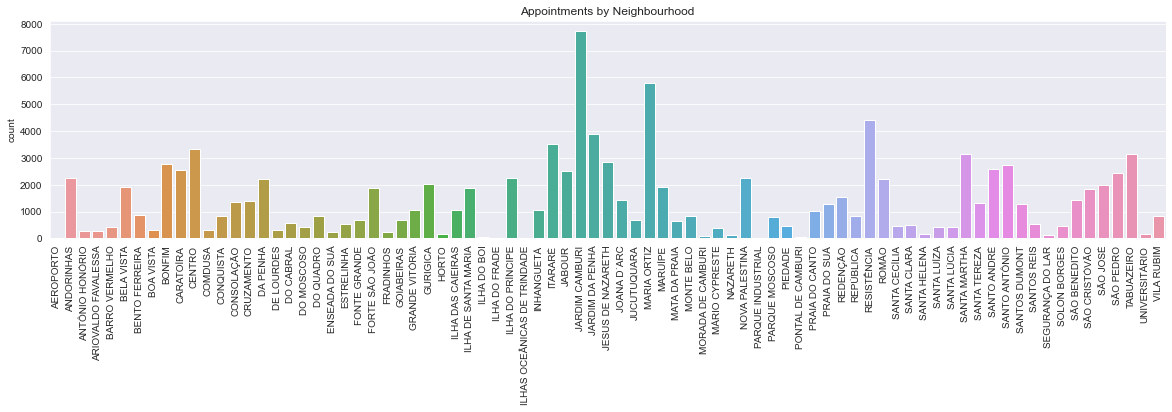

In [30]:
#We'll show this distribution with better a graph using seaborn
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plot = sns.countplot(x=np.sort(df['Neighbourhood']))
plot.set_title("Appointments by Neighbourhood")
plt.show();

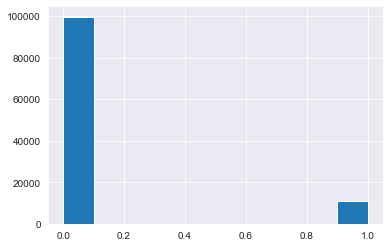

In [31]:
#Find out the distribution of Scholarship
df['Scholarship'].hist();

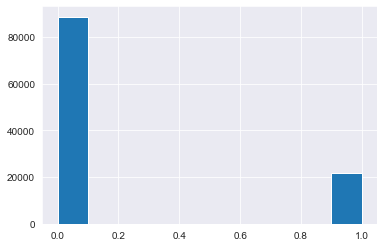

In [32]:
#Find out the distribution of Hypertension
df['Hypertension'].hist();

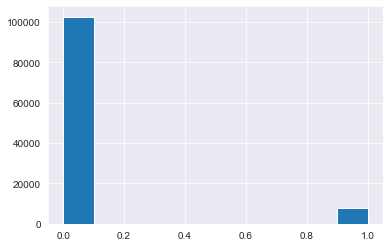

In [33]:
#Find out the distribution of Diabetes
df['Diabetes'].hist();

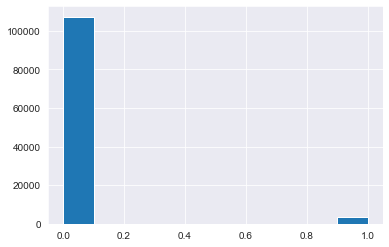

In [34]:
#Find out the distribution of Alcoholism
df['Alcoholism'].hist();

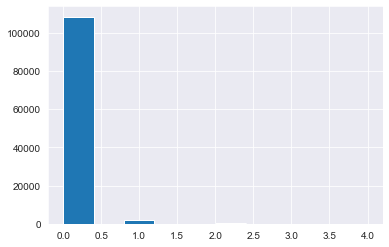

In [35]:
#Find out the distribution of Handicap
df['Handicap'].hist();

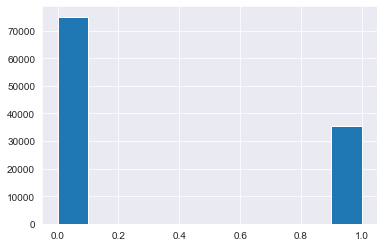

In [36]:
#Find out the distribution of SMS_Received
df['SMS_Received'].hist();

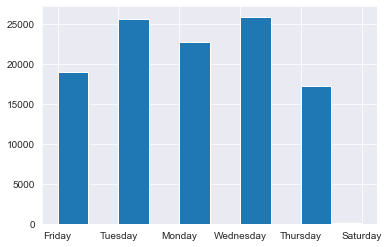

In [37]:
#Find out the distribution of Scheduled_Day
df['Scheduled_Day'].hist();

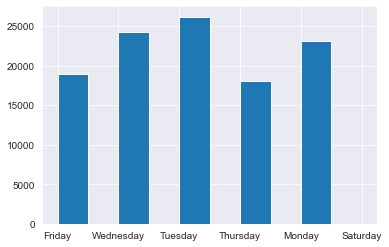

In [38]:
#Find out the distribution of Appointment Day
df['Appointment_Day'].hist();

### Multivariate Analysis

#### Is there relation between age and receiving of scholarships?
#### What properties are associated with showing up for appointments?

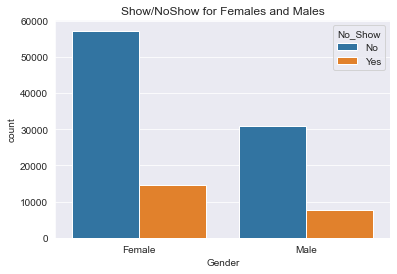

In [39]:
#Association between Gender and No_show
plot = sns.countplot(x=df['Gender'], hue=df['No_Show'], data=df)
xlabels=['Female', 'Male']
plot.set_title("Show/NoShow for Females and Males")
plot.set_xticklabels(xlabels)
plt.show();

From the analysis:
- Of the 88207 that showed up, about 57000 are females, and about 31000 are males.
- Of the 22319 that didn't show up, about 15000 are females, and about 7000 are males.<br><br>
More females than males have made appointments, thus Gender seems to be an important attribute. However, the ratio of show and No_Show looks about the same for both genders, therefore gender might not be an important factor influencing whether a patient shows up for an appointment or not. 

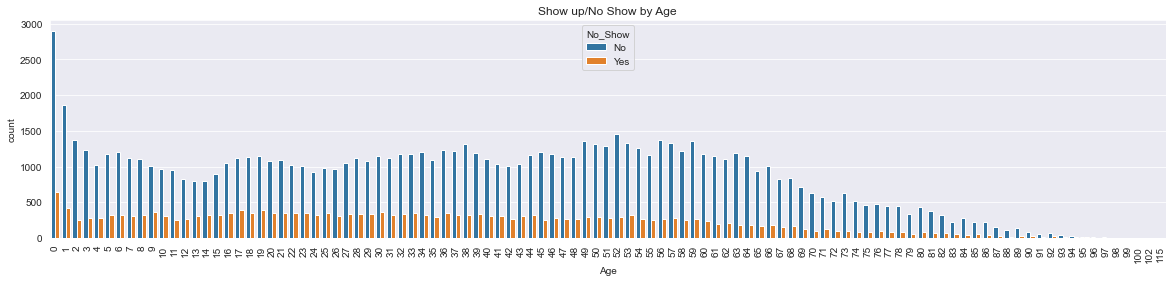

In [40]:
#Association between Age and No_show
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plot = sns.countplot(x=df['Age'], hue=df['No_Show'], data=df)
plot.set_title("Show up/No Show by Age")
plt.show()

From the analysis:
- Most appointments were made for infants between age 0 and 1, and less appointments for people above 70 years.
- The ratio of the patients showing up or not seems about the same for most of the ages, apart from ages 0 and 1. 

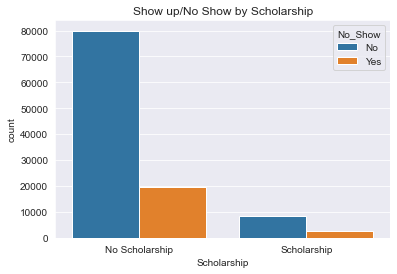

In [41]:
#Association between Scholarship and No_show
plot = sns.countplot(x=df['Scholarship'], hue=df['No_Show'], data=df)
xlabels=['No Scholarship', 'Scholarship']
plot.set_title("Show up/No Show by Scholarship")
plot.set_xticklabels(xlabels)
plt.show();

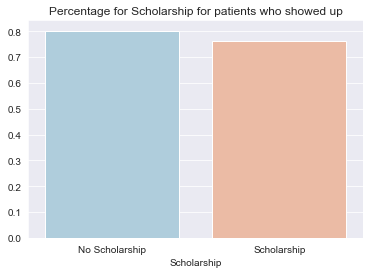

In [42]:
#Percentages for Scholarship for the patients who showed up for their appointments
df_scholar = df[df['No_Show'] == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
plot = sns.barplot(x=df_scholar.index, y=df_scholar, palette="RdBu_r")
plot.set_title("Percentage for Scholarship for patients who showed up")
x_labels=['No Scholarship', 'Scholarship']
plot.set_xticklabels(x_labels)
plt.show()

- From the analysis, about 80% of the patients who did not receive a scholarship showed up for their appointments as compared to about 70% show up of those who received the scholarship.
- Therefore, scholarship could be an important factor to determine whether a patient will show up for the appointment or not.

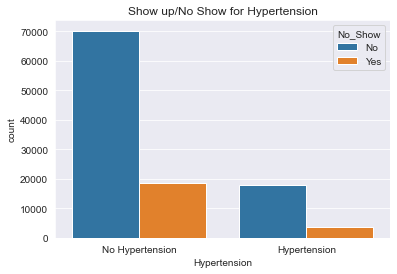

In [43]:
#Association between Hypertension and No_show
plot = sns.countplot(x=df['Hypertension'], hue=df['No_Show'], data=df)
xlabels=['No Hypertension', 'Hypertension']
plot.set_title("Show up/No Show for Hypertension")
plot.set_xticklabels(xlabels)
plt.show();

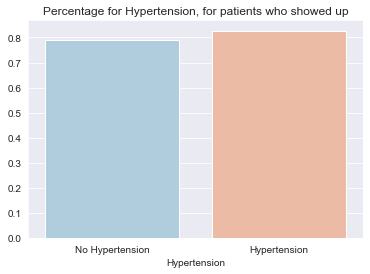

In [44]:
#Percentages for hypertension for the patients who showed up for their appointments
df_hyper = df[df['No_Show'] == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
plot = sns.barplot(x=df_hyper.index, y=df_hyper, palette="RdBu_r")
plot.set_title("Percentage for Hypertension, for patients who showed up")
x_labels=['No Hypertension', 'Hypertension']
plot.set_xticklabels(x_labels)
plt.show()

- From the above analysis, around 78% of the patients without Hypertension and about 82% of the patients with Hypertension showed up for their appointments.
- Therefore, Hypertension could be an important factor to determine whether a patient will show up for the appointment or not.

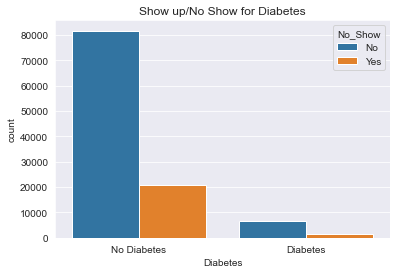

In [45]:
#Association between Diabetes and No_show
plot = sns.countplot(x=df['Diabetes'], hue=df['No_Show'], data=df)
xlabels=['No Diabetes', 'Diabetes']
plot.set_title("Show up/No Show for Diabetes")
plot.set_xticklabels(xlabels)
plt.show();

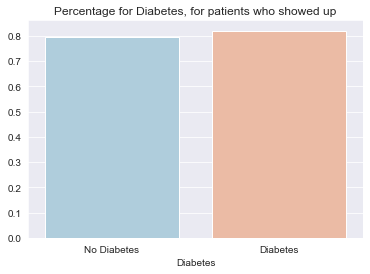

In [46]:
#Percentages for diabetes for the patients who showed up for their appointments
df_diabetes = df[df['No_Show'] == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
plot = sns.barplot(x=df_diabetes.index, y=df_diabetes, palette="RdBu_r")
plot.set_title("Percentage for Diabetes, for patients who showed up")
x_labels=['No Diabetes', 'Diabetes']
plot.set_xticklabels(x_labels)
plt.show()

- From the above analysis, around 79% of the patients without Diabetes and about 82% of the patients with Diabetes showed up for their appointments.
- Therefore, Diabetes could be an important factor to determine whether a patient will show up for the appointment or not.

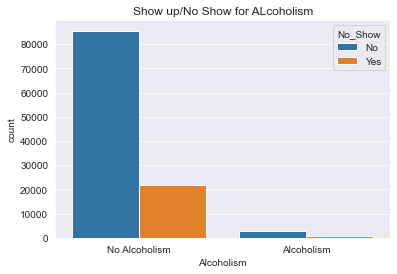

In [47]:
#Association between Alcoholism and No_show
plot = sns.countplot(x=df['Alcoholism'], hue=df['No_Show'], data=df)
xlabels=['No Alcoholism', 'Alcoholism']
plot.set_title("Show up/No Show for ALcoholism")
plot.set_xticklabels(xlabels)
plt.show();

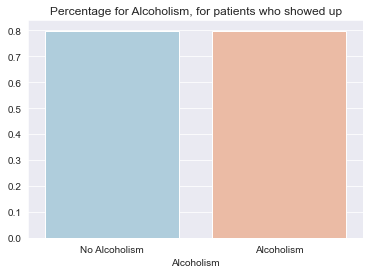

In [48]:
#Percentages for Alcoholism for the patients who showed up for their appointments
df_alco = df[df['No_Show'] == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
plot = sns.barplot(x=df_alco.index, y=df_alco, palette="RdBu_r")
plot.set_title("Percentage for Alcoholism, for patients who showed up")
x_labels=['No Alcoholism', 'Alcoholism']
plot.set_xticklabels(x_labels)
plt.show()

- From the above analysis, the percentage of patients who suffer from or don't suffer from alcoholism, and showed up for their appointments are equal.
- Therefore, Alcoholism is not much of an important factor to determine whether a patient will show up for the appointment or not.

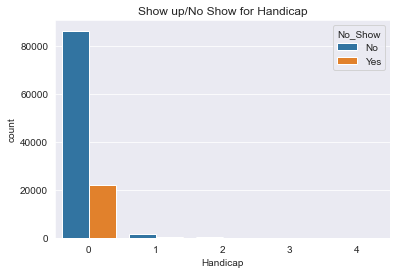

In [49]:
#Association between Handicap and No_show
plot = sns.countplot(x=df['Handicap'], hue=df['No_Show'], data=df)
plot.set_title("Show up/No Show for Handicap")
plt.show()

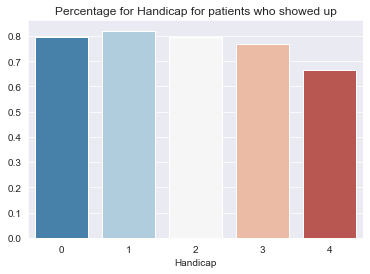

In [50]:
df_handicap = df[df['No_Show'] == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
plot = sns.barplot(x=df_handicap.index, y=df_handicap, palette="RdBu_r")
plot.set_title("Percentage for Handicap for patients who showed up")
plt.show()

- From the above analysis, around 80% of the patients with no handicap showed up for their appointments, while around 82%, 80%, 77%, and 66% of the patients with 1, 2, 3, and 4 handicaps respectively, showed up for their appointments.
- Therefore, Handicap is an important factor to determine whether a patient will show up for the appointment or not.

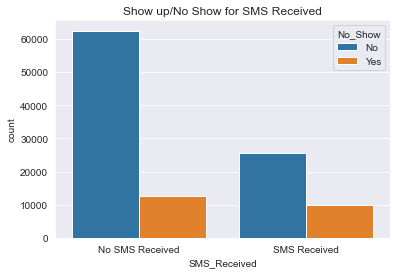

In [51]:
#Association between SMS_Received and No_show
plot = sns.countplot(x=df['SMS_Received'], hue=df['No_Show'], data=df)
xlabels=['No SMS Received', 'SMS Received']
plot.set_title("Show up/No Show for SMS Received")
plot.set_xticklabels(xlabels)
plt.show();

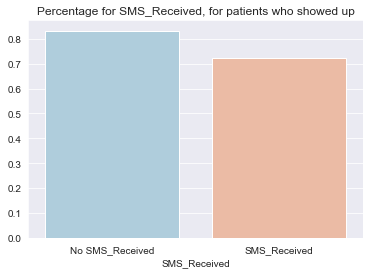

In [52]:
#Percentages for SMS_Received for the patients who showed up for their appointments
df_sms = df[df['No_Show'] == 'No'].groupby(['SMS_Received']).size()/df.groupby(['SMS_Received']).size()
plot = sns.barplot(x=df_sms.index, y=df_sms, palette="RdBu_r")
plot.set_title("Percentage for SMS_Received, for patients who showed up")
x_labels=['No SMS_Received', 'SMS_Received']
plot.set_xticklabels(x_labels)
plt.show()

- Most of the patients did not receive an SMS.
- From the above analysis, around 82% of the patients who did not receive an SMS and about 72% of the patients who received an SMS, showed up for their appointments.
- Therefore, SMS_Received could be an important factor to determine whether a patient will show up for the appointment or not.

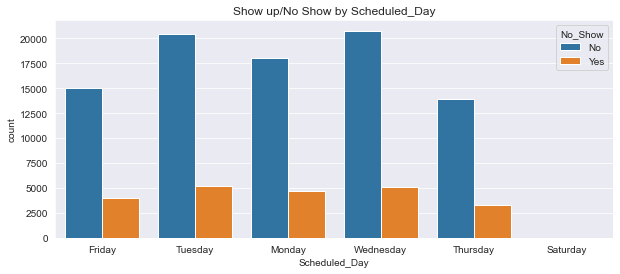

In [53]:
#Association between Scheduled_Day and No_show
plt.figure(figsize=(10,4))
plot = sns.countplot(x=df['Scheduled_Day'], hue=df['No_Show'], data=df)
plot.set_title("Show up/No Show by Scheduled_Day")
plt.show()

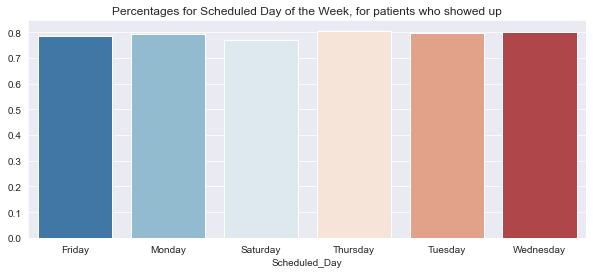

In [54]:
#Percentages for Scheduled_Day for the patients who showed up for their appointments
df_scheduled = df[df['No_Show'] == 'No'].groupby(['Scheduled_Day']).size()/df.groupby(['Scheduled_Day']).size()
plt.figure(figsize=(10,4))
plot = sns.barplot(x=df_scheduled.index, y=df_scheduled, palette="RdBu_r")
plot.set_title("Percentages for Scheduled Day of the Week, for patients who showed up")
plt.show()

- There's a slight difference in the percentages, 
- Scheduled_Day as a feature helps just a little in determining show or no show of patients

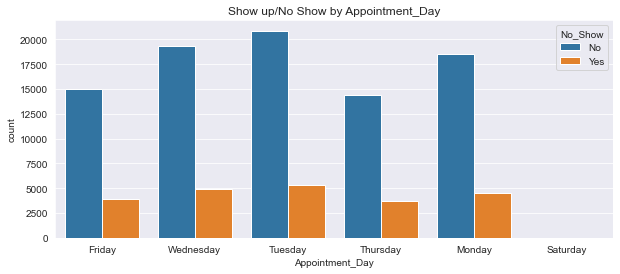

In [55]:
#Association between Appointment_Day and No_show
plt.figure(figsize=(10,4))
plot = sns.countplot(x=df['Appointment_Day'], hue=df['No_Show'], data=df)
plot.set_title("Show up/No Show by Appointment_Day")
plt.show()

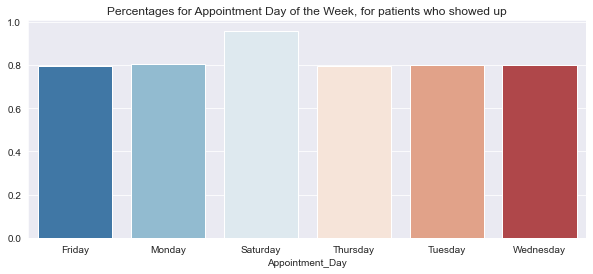

In [56]:
#Percentages for Appointment_Day for the patients who showed up for their appointments
df_appoint = df[df['No_Show'] == 'No'].groupby(['Appointment_Day']).size()/df.groupby(['Appointment_Day']).size()
plt.figure(figsize=(10,4))
plot = sns.barplot(x=df_appoint.index, y=df_appoint, palette="RdBu_r")
plot.set_title("Percentages for Appointment Day of the Week, for patients who showed up")
plt.show()

- The percentages are about the same, for patients who showed up, therefore the Appointment day of the week is not that important in determining whether a patient will show up for the appointment or not.

<a id='conclusions'></a>
## Conclusions

<b>The following are the conclusions from the Univariate Analysis:</b>
- 88207 patients showed up for their appointments while 22319 did not.
- Most of the patients did not receive a scholarship.
- Most appointments were made for infants between age 0 and 1, and less appointments for people above 70 years.
- Most of the patients do not have Hypertension.
- Most of the patients do not have Diabetes.
- Most of the patients do not suffer from Alcohlism.
- Most of the patients did not receive an SMS.

<b>From the Bivariate Analysis, the following are the conclusions:</b>
- In matters age, The ratio of the patients showing up or not seems about the same for most of the ages, apart from ages 0 and 1. 

- As for gender, More females than males have made appointments, thus Gender is a relevant attribute. However, the ratio of show and No_Show looks about the same for both genders, therefore Gender might not be an important factor influencing whether a patient shows up for an appointment or not.

- Most of the neighbourhoods have less appointments made, with a few number of them having the most appointments, the highest being Jardim Camburi.

- About 80% of the patients who did not receive a scholarship showed up for their appointments as compared to about 70% show up of those who received the scholarship. Therefore, scholarship could be an important factor to determine whether a patient will show up for the appointment or not.

- Around 78% of the patients without Hypertension and about 82% of the patients with Hypertension showed up for their appointments. Therefore, Hypertension could be an important factor to determine whether a patient will show up for the appointment or not.

- Around 79% of the patients without Diabetes and about 82% of the patients with Diabetes showed up for their appointments. Therefore, Diabetes could be an important factor to determine whether a patient will show up for the appointment or not.

- The percentage of patients who suffer from or don't suffer from alcoholism, and showed up for their appointments are equal. Therefore, Alcoholism is not much of an important factor to determine whether a patient will show up for the appointment or not.

- Around 80% of the patients with no handicap showed up for their appointments, while around 82%, 80%, 77%, and 66% of the patients with 1, 2, 3, and 4 handicaps respectively, showed up for their appointments. Therefore, Handicap is an important factor to determine whether a patient will show up for the appointment or not.

- Around 82% of the patients who did not receive an SMS and about 72% of the patients who received an SMS, showed up for their appointments, which is out of the ordinary as it is expected that those who are reminded of their appointments are more likely to show up. Therefore, SMS_Received could be an important factor to determine whether a patient will show up for the appointment or not.

- As for the Scheduled Day of the week for the appointment, there's a slight difference in the percentages, thus Scheduled_Day as a feature helps just a little in determining show or no show of patients.

- For Appointment Day of the week, the percentages are about the same, for patients who showed up, therefore the Appointment day of the week is not that important in determining whether a patient will show up for the appointment or not.

### References:
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- Seaborn documentation: https://seaborn.pydata.org/api.html
- Numpy documentation: https://numpy.org/doc/stable
- Kaggle.com/notebooks